**Neste trabalho, exploraremos o dataframe de lançamentos de filmes e séries da Netflix, disponibilizado no site da Kaggle.**

**Nosso objetivo é entender o que motiva a empresa a lançar mais séries/filmes de certos gêneros em relação a outros. Para isso, realizaremos uma limpeza dos dados e, em seguida, uma análise exploratória.**

**Observação:o dataframe não possui uma descrição de certos valores. Por conta disso, alguns valores que aparecem no dataframe foram classificados como "indefinidos"**

link : https://www.kaggle.com/datasets/willianoliveiragibin/netlifx-hour-2023

In [1]:
#Principais bibliotecas usadas para a exploração
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#Ferramentas para melhorar a visualização
sns.set(style="darkgrid")
pd.set_option('display.max.rows',None)
pd.set_option('display.max.columns',None)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/2023/dados/total_netflix_2023 new.csv')

# Entendendo o dataframe e fazendo limpeza de seus dados

In [3]:
print(df.shape)
df.head()

(18332, 9)


,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you..."
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"['Drama', 'History', 'Romance']","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"['Comedy', 'Romance']","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as..."


* **O formato com que se encontra as células da coluna 'genre' é bem bagunçada. Já que nessas primeiras 5 observações temos listas misturadas com strings.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                18332 non-null  object
 1   Available Globally?  18332 non-null  object
 2   Release Date         18332 non-null  object
 3   Hours Viewed         18332 non-null  object
 4   Number of Ratings    18332 non-null  object
 5   Rating               18332 non-null  object
 6   Genre                18332 non-null  object
 7   Key Words            18332 non-null  object
 8   Description          18332 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


* **As colunas númericas como 'rating','Hours Viewed' e 'Number of Ratings' estão como objeto. Vai ser nescessário passar elas para int ou float**

In [5]:
#Verificando o total de np.nan no dataframe
df.isna().sum().sum()

0

* **Sem NA'S**

In [6]:
#Verificando as linhas repetidas
df[df.duplicated()==True]

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
18242,Wolf // Varg,No,0,0,0,0,0,0,0
18268,You Are the Apple of My Eye // 那些年，我們一起追的女孩,No,0,0,0,0,0,0,0


**Apenas duas ocorrências de linhas repetidas**

In [7]:
df[df['Title']=='You Are the Apple of My Eye // 那些年，我們一起追的女孩']

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
18267,You Are the Apple of My Eye // 那些年，我們一起追的女孩,No,0,0,0,0,0,0,0
18268,You Are the Apple of My Eye // 那些年，我們一起追的女孩,No,0,0,0,0,0,0,0


In [8]:
df[df['Title']=='Wolf // Varg']

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
18241,Wolf // Varg,No,0,0,0,0,0,0,0
18242,Wolf // Varg,No,0,0,0,0,0,0,0


* **Só existem duas ocorrências de linhas repetidas e que possuem valor 0 em suas células. Ou seja, estão indefinidas. Muito provavelmente não vão entrar nas análises futuras**

In [9]:
#Cardinalidade de cada coluna
for i in df.columns:
  print('Cardinality:',df[i].nunique(),'\t',i)

Cardinality: 18214 	 Title
Cardinality: 2 	 Available Globally?
Cardinality: 1667 	 Release Date
Cardinality: 587 	 Hours Viewed
Cardinality: 2267 	 Number of Ratings
Cardinality: 82 	 Rating
Cardinality: 394 	 Genre
Cardinality: 2337 	 Key Words
Cardinality: 1900 	 Description


In [10]:
#Avaliando o conteúdo de cada coluna (menos title)
colunas = df.columns
for i in colunas:
  print(i)
  print(df[i].unique())
  print('\n')

Title
['The Night Agent: Season 1' 'Ginny & Georgia: Season 2'
 'The Glory: Season 1 // 더 글로리: 시즌 1' ... '두근두근 내 인생' '라디오 스타' '선생 김봉두']


Available Globally?
['Yes' 'No']


Release Date
['2023-03-23' '2023-01-05' '2022-12-30' ... '2020-09-28' 'Release Date'
 '0']


Hours Viewed
['812100000' '665100000' '622800000' '507700000' '503000000' '440600000'
 '429600000' '402500000' '302100000' '266200000' '262600000' '252500000'
 '251500000' '249900000' '235000000' '234800000' '229700000' '221100000'
 '214100000' '209700000' '206500000' '205500000' '201800000' '200700000'
 '194700000' '192900000' '184000000' '182300000' '181800000' '176800000'
 '175500000' '174300000' '173600000' '172400000' '168300000' '163000000'
 '161100000' '157600000' '155300000' '153900000' '152100000' '151400000'
 '150200000' '148600000' '146900000' '146700000' '142900000' '140100000'
 '139900000' '139300000' '136600000' '136200000' '135900000' '134800000'
 '133600000' '133500000' '133400000' '126400000' '124400000' '12

Alguns valores a serem notados em cada coluna:
* **Release Data**: possui valores como 'release data' e '0'. Valores que podem ser entendidos como indefinidos

* **Hours Viewed**: possui valores como 'hours viewed' e '0'. O valor zero e 'Hours Viewed' vão ser interpretados como indefinidos.

* **Number of Ratings**: também possui dois valores indefinidos que no caso são "Number of rating" e '0'.

* **Genre:** possui valores indefinidos como 'genre' e '0'. Além, das strings misturadas com listas.

In [11]:
# Implementando valores '0-0-0' nas celulas
#que possuem valores '0' e 'Release Data' na coluna "release date"
df['Release Date'].replace({'0':'0-0-0',
                           'Release Date':'0-0-0'},
                           inplace=True)

#Criando uma coluna com os anos de lançamento
df['Year'] = df['Release Date'].apply(lambda x: x.split('-')[0])

#Criando uma coluna com os meses de lançamento
df['Month'] = df['Release Date'].apply(lambda x: x.split('-')[1])

#Criando uma coluna com os dias de lançamento
df['Day'] = df['Release Date'].apply(lambda x: x.split('-')[2])

#visualizando as colunas
df.tail(10)

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description,Year,Month,Day
18322,Żyć nie umierać,No,0-0-0,0,0,0,0,0,0,0,0,0
18323,أصحاب ...ولا أعزّ,No,0-0-0,0,0,0,0,0,0,0,0,0
18324,الناموس: Season 1,No,0-0-0,0,0,0,0,0,0,0,0,0
18325,حكايات بنات الجزء ١: Season 2,No,0-0-0,0,0,0,0,0,0,0,0,0
18326,حكايات بنات الجزء ١: Season 3,No,0-0-0,0,0,0,0,0,0,0,0,0
18327,راس السنة,No,0-0-0,0,0,0,0,0,0,0,0,0
18328,心が叫びたがってるんだ。,No,0-0-0,0,0,0,0,0,0,0,0,0
18329,두근두근 내 인생,No,0-0-0,0,0,0,0,0,0,0,0,0
18330,라디오 스타,No,0-0-0,0,0,0,0,0,0,0,0,0
18331,선생 김봉두,No,0-0-0,0,0,0,0,0,0,0,0,0


In [12]:
#Alterando o tipo das colunas númericas
df['Hours Viewed']=df['Hours Viewed'].replace({'Hours Viewed':0}).astype(int)

df['Number of Ratings'] = df['Number of Ratings'].replace({
    'Number of Ratings':0
}).astype(float)

df['Rating'] = df['Rating'].replace({'Rating':0}).astype(float)

df[['Year','Month','Day']] = df[['Year','Month','Day']].astype(int)

In [13]:
#Verificando novamente dtype de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                18332 non-null  object 
 1   Available Globally?  18332 non-null  object 
 2   Release Date         18332 non-null  object 
 3   Hours Viewed         18332 non-null  int64  
 4   Number of Ratings    18332 non-null  float64
 5   Rating               18332 non-null  float64
 6   Genre                18332 non-null  object 
 7   Key Words            18332 non-null  object 
 8   Description          18332 non-null  object 
 9   Year                 18332 non-null  int64  
 10  Month                18332 non-null  int64  
 11  Day                  18332 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


In [14]:
# Limpando as strings da coluna 'Genre'
df['Genre'] = df['Genre'].apply(lambda x:
              x.replace('[','').replace(']','').replace("'","").replace(" ",'')
                        )
df['Genre'] = df['Genre'].replace({'Genre':'undefined','0':'undefined'})
df['Genre'][:20]

0     Biography,Drama,History
1        Comedy,Drama,Romance
2                       Short
3       Drama,History,Romance
4              Comedy,Romance
5          Action,Crime,Drama
6        Comedy,Drama,Romance
7                Short,Comedy
8             Action,Thriller
9        Comedy,Drama,Romance
10               Drama,Family
11                      Short
12        Crime,Drama,Mystery
13                      Sport
14            Action,Thriller
15     Action,Adventure,Drama
16      Horror,Mystery,Sci-Fi
17       Family,History,Sport
18             Comedy,Romance
19                    Romance
Name: Genre, dtype: object

In [15]:
print(df['Genre'].unique())

['Biography,Drama,History' 'Comedy,Drama,Romance' 'Short'
 'Drama,History,Romance' 'Comedy,Romance' 'Action,Crime,Drama'
 'Short,Comedy' 'Action,Thriller' 'Drama,Family' 'Crime,Drama,Mystery'
 'Sport' 'Action,Adventure,Drama' 'Horror,Mystery,Sci-Fi'
 'Family,History,Sport' 'Romance' 'Drama,Horror,Thriller'
 'Action,Comedy,Crime' 'Comedy' 'Adventure,Family,Fantasy'
 'Animation,Action,Adventure' 'Adventure,Comedy,Family'
 'Comedy,Crime,Drama' 'Horror' 'Animation,Short' 'Drama,Fantasy,Horror'
 'Crime,Drama' 'Adventure,Comedy,Drama' 'Documentary,Short'
 'Crime,Horror,Mystery' 'Documentary' 'Short,Drama'
 'Family,Musical,Animation' 'Documentary,Crime' 'Drama,Romance'
 'Drama,Western' 'Drama,Horror,Sci-Fi' 'Animation,Short,Adventure'
 'Comedy,Drama,Music' 'Short,Drama,War' 'Documentary,Sport'
 'Comedy,Drama,Horror' 'Biography,Crime,Drama' 'Action,Drama,History'
 'Comedy,Drama,Family' 'Drama,War' 'Drama' 'Short,Biography,Drama'
 'Drama,Music' 'Comedy,Talk-Show' 'Animation,Comedy,Sci-Fi'
 'Act

* **Fica mais tranquilo de acessar os valores que cada célula da coluna "Genre" possui agora.**

In [16]:
#A variável lista irá conter todos os gêneros individualmente
#de cada observação da coluna 'genre'
lista = []
z = df['Genre']
for i in z.unique():
  for j in range(len(i.split(','))):
    lista.append(i.split(',')[j])

#Nessa series se encotram todas as ocorrências de gêneros.
generos = pd.Series(data=lista)
#Aqui vamos conseguir observar todos os gêneros
#que se encontram no dataframe separadamente
lista_generos = generos.unique()
lista_generos

array(['Biography', 'Drama', 'History', 'Comedy', 'Romance', 'Short',
       'Action', 'Crime', 'Thriller', 'Family', 'Mystery', 'Sport',
       'Adventure', 'Horror', 'Sci-Fi', 'Fantasy', 'Animation',
       'Documentary', 'Musical', 'Western', 'Music', 'War', 'Talk-Show',
       'Reality-TV', 'Game-Show', 'News', 'undefined'], dtype=object)

In [18]:
#cada chave dessa variável "generos_valor" vai conter uma lista com valores
#'Yes' ou 'No'. Para indicar se existe menção do gênero na linha observada.
#A ideia é criar uma tabela com as colunas sendo os gêneros
generos_valor = {}
for i in range(len(lista_generos)):
  a = []
  for j in df['Genre']:
    if lista_generos[i] in j.split(','):
      a.append('Yes')
    else:
      a.append('No')
  generos_valor[lista_generos[i]] = a

#tabela onde vamos poder acessar a informação se em uma linha especifica
#encontramos um gênero especifíco
tabela_generos = pd.DataFrame(data=generos_valor)

#visualizando a tabela
tabela_generos.head(15)

,Biography,Drama,History,Comedy,Romance,Short,Action,Crime,Thriller,Family,Mystery,Sport,Adventure,Horror,Sci-Fi,Fantasy,Animation,Documentary,Musical,Western,Music,War,Talk-Show,Reality-TV,Game-Show,News,undefined
0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,No,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
5,No,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
6,No,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
7,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
8,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
9,No,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [19]:
#concatenando a tabela criada com o dataframe original
df = pd.concat([df,tabela_generos],axis=1)

#visualizando
df.head(15)

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description,Year,Month,Day,Biography,Drama,History,Comedy,Romance,Short,Action,Crime,Thriller,Family,Mystery,Sport,Adventure,Horror,Sci-Fi,Fantasy,Animation,Documentary,Musical,Western,Music,War,Talk-Show,Reality-TV,Game-Show,News,undefined
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography,Drama,History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...,2023,3,23,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy,Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you...",2023,1,5,No,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,Short,"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...,2022,12,30,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"Drama,History,Romance","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...,2022,11,23,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"Comedy,Romance","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as...",2023,5,4,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
5,You: Season 4,Yes,2023-02-09,440600000,3323.0,7.9,"Action,Crime,Drama","producer,three word title,headstrong,arranged ...",Retired ex national team female handball playe...,2023,2,9,No,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
6,La Reina del Sur: Season 3,No,2022-12-30,429600000,5216.0,5.7,"Comedy,Drama,Romance","female protagonist,assassin,daughter,danger,fight",Wife and mother Miriam begins a downward emoti...,2022,12,30,No,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
7,Outer Banks: Season 3,Yes,2023-02-23,402500000,35.0,7.6,"Short,Comedy","teacher,tutor,mother daughter relationship,kor...",Brilliant but disgraced detective John Luther ...,2023,2,23,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
8,Ginny & Georgia: Season 1,Yes,2021-02-24,302100000,44102.0,5.6,"Action,Thriller","close up of eye,close up of eyes,close up of l...",After barely surviving his grievous wounds fro...,2021,2,24,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
9,FUBAR: Season 1,Yes,2023-05-25,266200000,3963.0,7.8,"Comedy,Drama,Romance","psychological thriller,serial killer,ice,cyber...",Dark forces conspire against orphan mapmaker A...,2023,5,25,No,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


#EDA

In [21]:
#Olhando os 10 gêneros mais lançados no dataframe
df['Genre'].value_counts().sort_values(ascending=False)[:10]

Comedy                        1560
Short                          905
Documentary                    810
Drama                          630
Animation,Action,Adventure     570
Comedy,Drama                   490
Comedy,Romance                 485
Animation,Adventure,Comedy     430
undefined                      427
Comedy,Drama,Romance           375
Name: Genre, dtype: int64

* **Interessante notar que os 4 primeiros gêneros estão "sozinhos" e são os mais lançados no dataframe como um todo.**

* **Vamos ver se esses 4 gêneros aparecem ao longo dos anos como os mais lançados.**

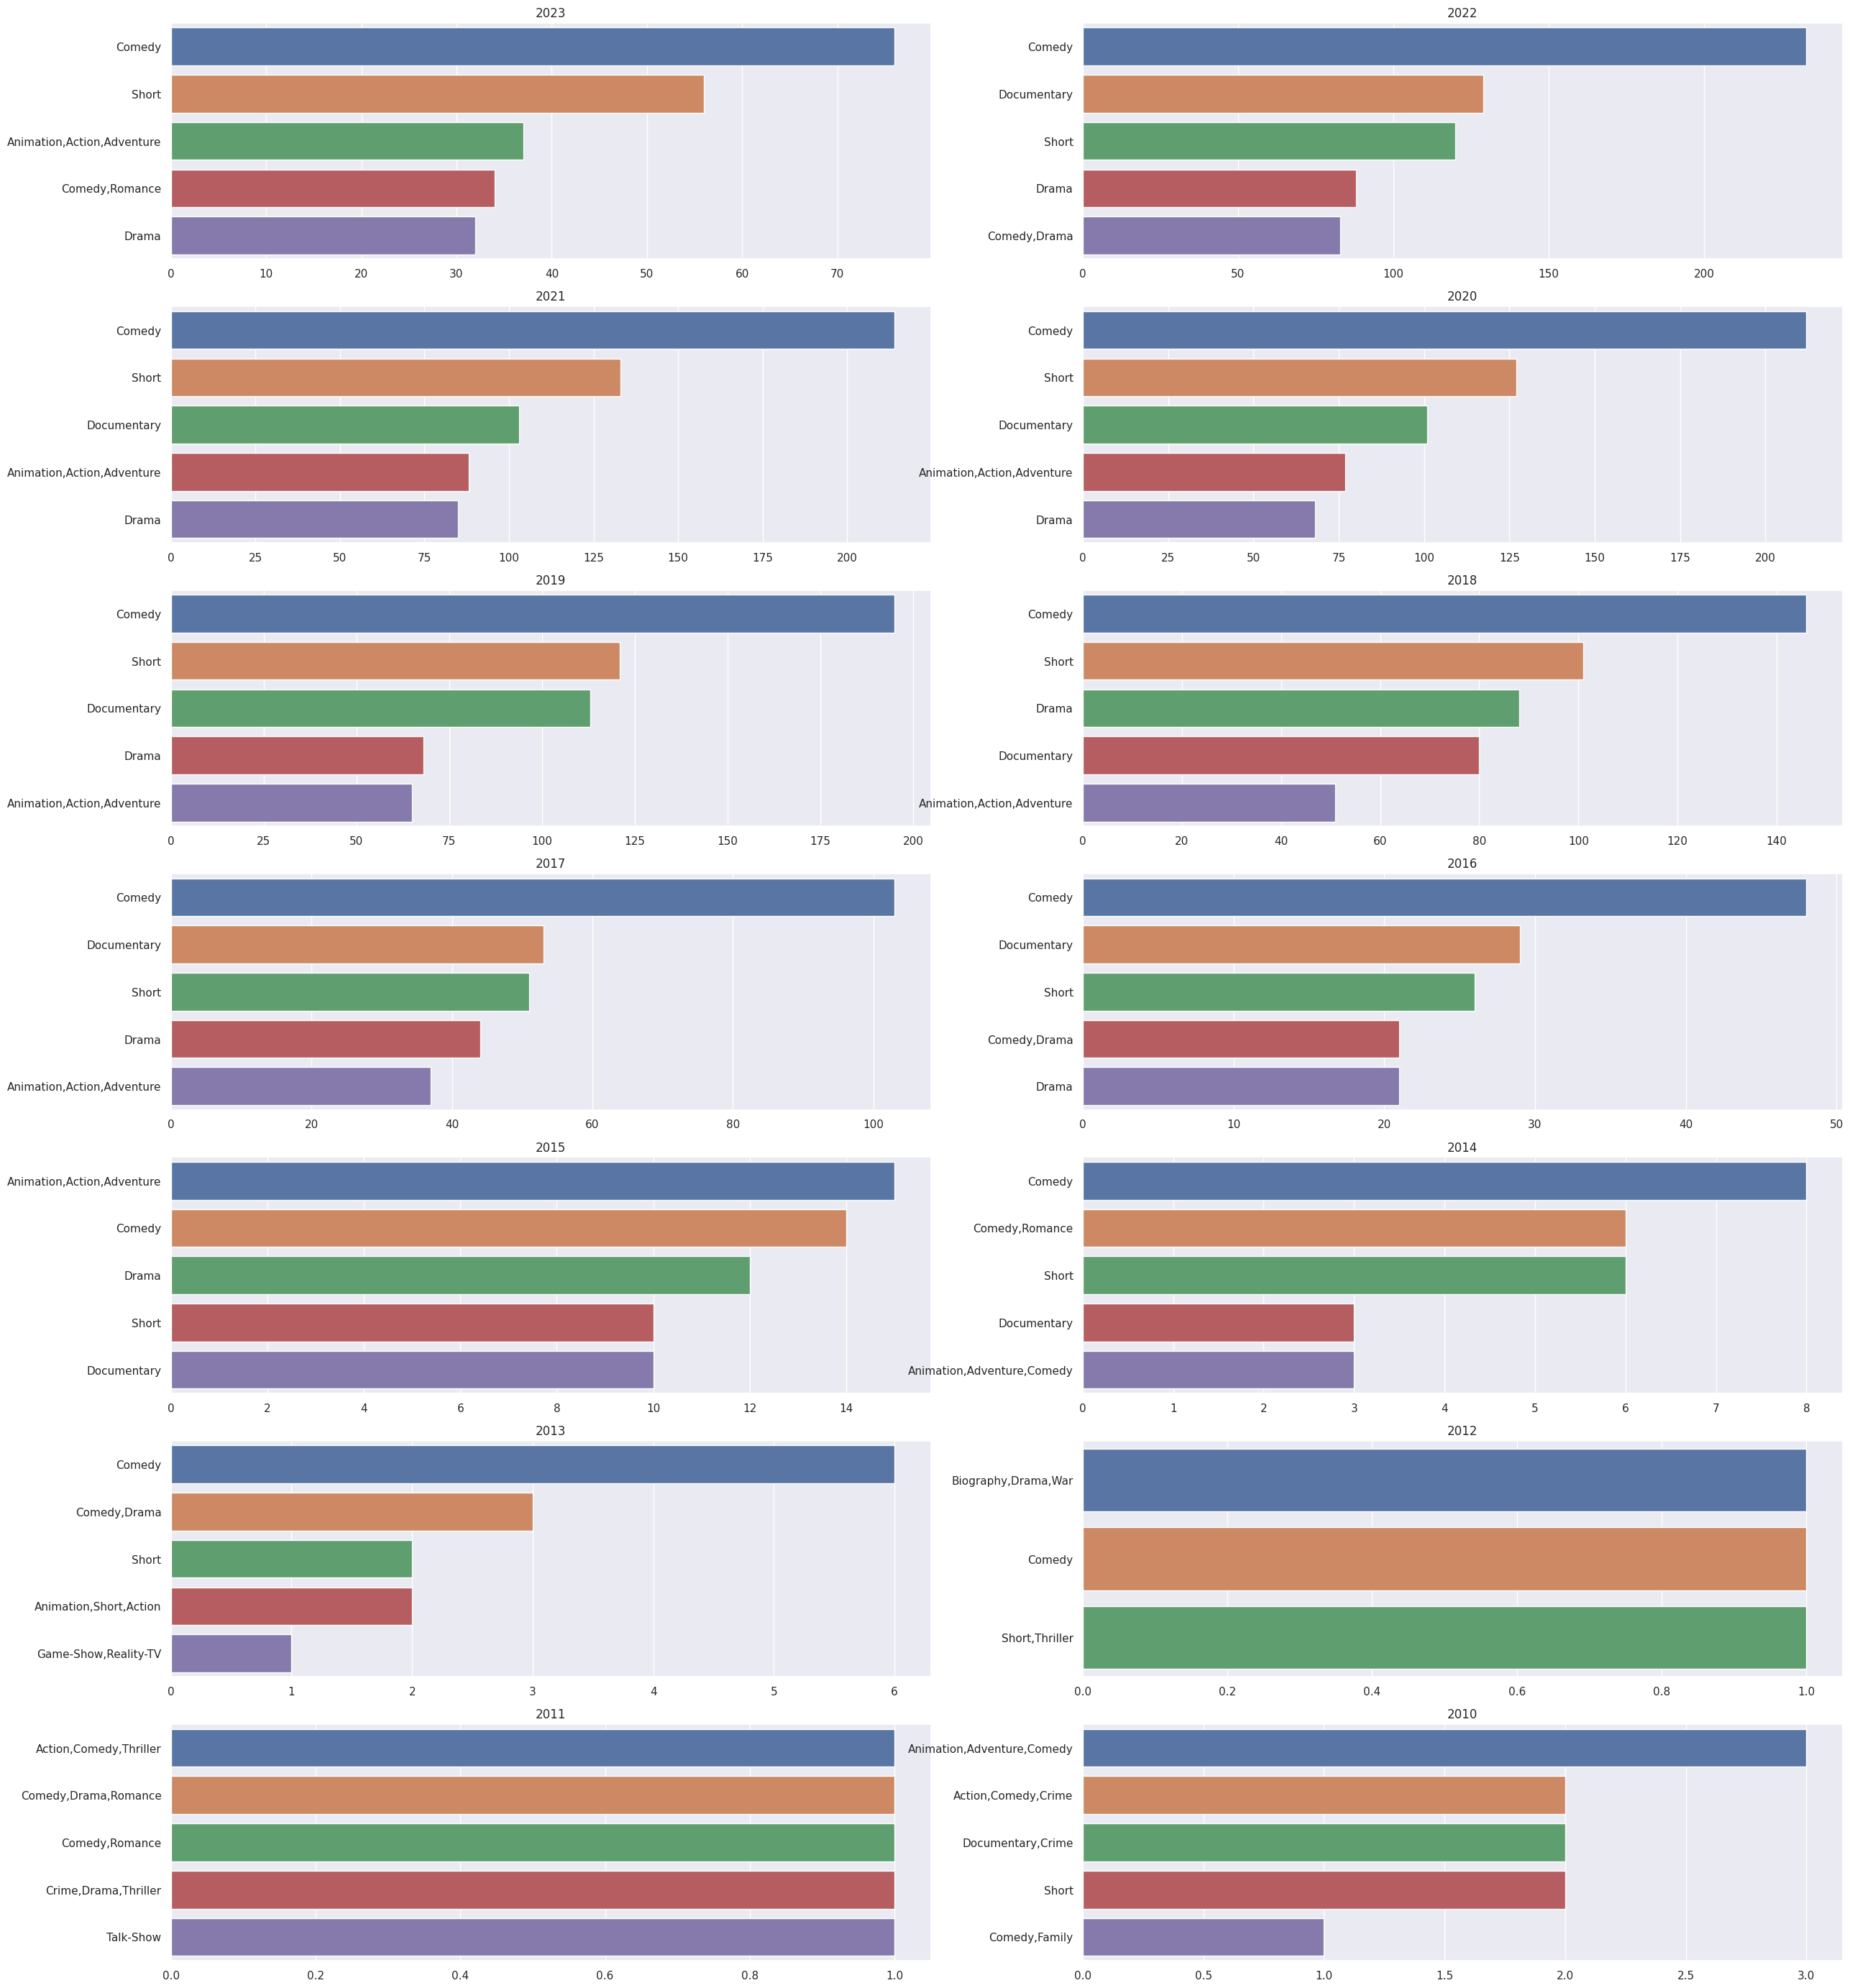

In [58]:
#Lista com os anos encontrados no dataframe em ordem decrescente
ano = [2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010]

plt.figure(figsize=(30,35))
#loop para o qual vamos acessar as informações de quantidade de lançamento de
#cada gênero por ano e posicionar essas informações em um conjunto de gráficos
for i,j in enumerate(ano):
  z = df[df['Year']==j]['Genre'].value_counts().sort_values(ascending=False)[:5]
  plt.subplot(7,2,i+1)
  sns.barplot(x=z.values,y=z.index)
  plt.title(j)
plt.show()

* **Temos que os 4 gêneros mais lançados do dataframe. Também aparecem como os 5 mais lançados na maioria dos anos de observação do dataframe.**

* **Um detalhe que podemos notar, é que de 2010 até 2015 temos valores baixos de lançamentos comparados com o resto dos outros anos. Provavelmente, os valores que se encontram como "0" na coluna 'Year', parte deles devem pertencer há esses anos com baixos valores de lançamento.**

In [23]:
#Agrupando as observações por gênero e somando as horas assistidas
#em cada gênero
z = df[['Genre','Hours Viewed']].groupby('Genre').sum().sort_values(
                                                    by='Hours Viewed',
                                                    ascending=False
                                                                    )
#Formatando as células para que as casas dos milhares sejam separadas para uma
#melhor visualização do resultadado das somas das horas
z = z['Hours Viewed'].map('{:,}'.format)
z.head()

Genre
Comedy                  11,724,000,000
Short                    8,797,400,000
Documentary              7,009,300,000
Comedy,Drama,Romance     5,306,400,000
Drama                    5,033,800,000
Name: Hours Viewed, dtype: object

* **Já da para notar a motivação pela qual esses 4 gêneros são os mais lançados. Eles se encontram no top 5 gêneros mais assistidos do dataframe todo.**

* **O impressionante é a quantidade de horas assistidas no dataframe. Encontramos uma soma de horas assistidas da ordem de bilhões de horas em apenas 1 gênero**

* **Vamos dar uma olhada se alguns desses 4 gêneros poussui um comportamento diferenciado dos demais 4 gêneros ao longo dos anos.**

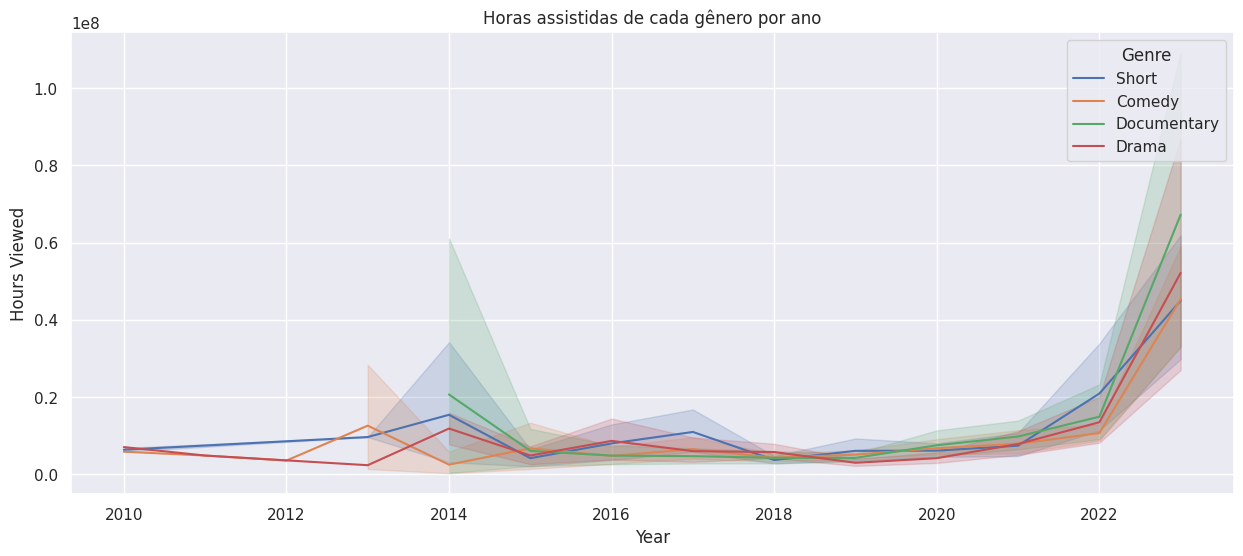

In [59]:
#Selecionando apenas os 4 gêneros mais assistidos
z = df[(df['Genre'].isin(['Comedy',
                          'Drama',
                          'Documentary',
                          'Short'])) & (df['Year']!=0)]

#Plotando a média de horas assistidas por gênero a cada ano
plt.figure(figsize=(15,6))
sns.lineplot(data=z,x='Year',y='Hours Viewed',hue='Genre');
plt.title('Horas assistidas de cada gênero por ano')
plt.show()

* **Se nota, que em média esses 4 gêneros possuem comportamento bem parecidos ao longo dos anos.**

* **A partir de 2020 teemos um crescimento abrupto no valor médio de horas assistidas. Lembrando que em 2020 foi o início da pandemia global de covid-19**

In [25]:
#Obtendo a informação do quanto de avaliações que
#cada gênero recebeu no dataframe

z = df[['Genre','Number of Ratings']].groupby('Genre').sum().sort_values(
    by='Number of Ratings',
    ascending=False
    )
#Separando as casas de milhar
z = z['Number of Ratings'].map('{:,}'.format)
z.head()

Genre
Comedy                        23,205,034.0
Short                         17,362,785.0
Drama                         15,700,498.0
Documentary                   13,627,882.0
Animation,Action,Adventure    13,542,761.0
Name: Number of Ratings, dtype: object

* **São 4 gêneros que recebem muito feedback de seus clientes. Então se torna muito confiável investir em lançamentos que possuem esses 4 gêneros**

* **Vamos analisar a seguir se este feedback também se repete ao longo dos anos observados no dataframe.**

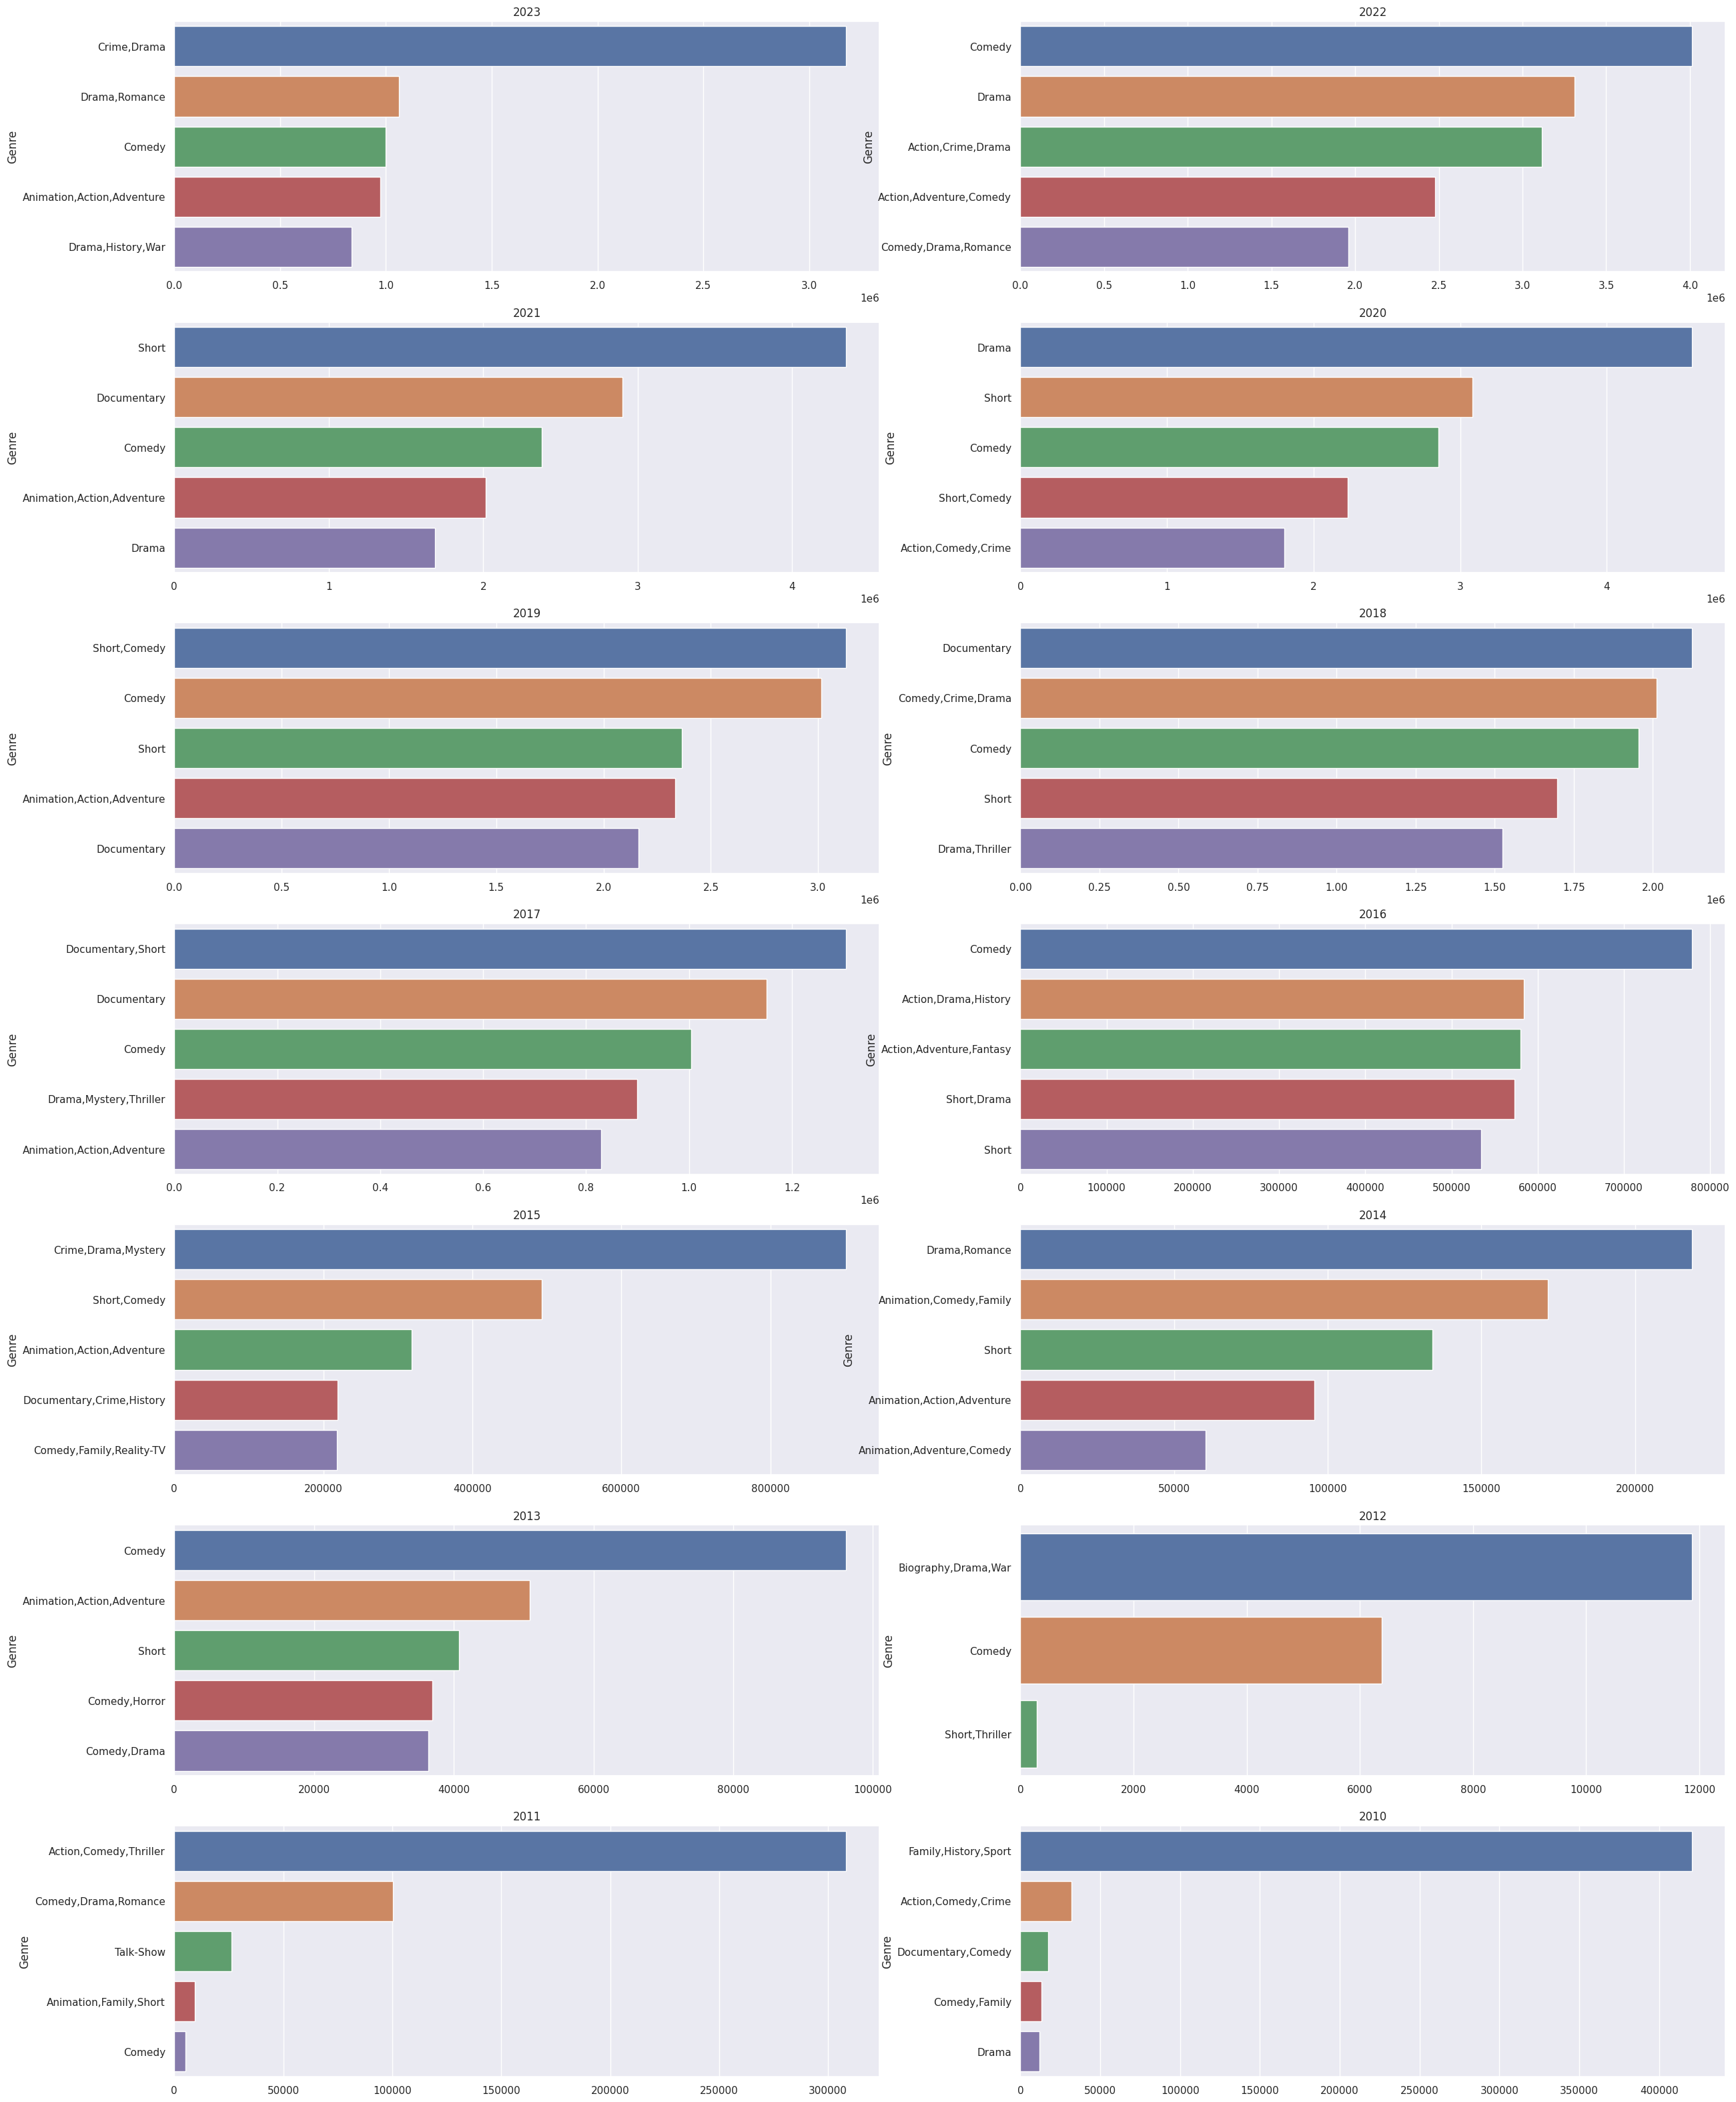

In [62]:
plt.figure(figsize=(30,40))
for i,j in enumerate(ano):
#Foi nescessário criar uma excessão para 2012. Já que neste ano só existem
#3 gêneros lançados
  if j!=2012:
    #Recebendo o dados com os 5 gêneros mais avaliados de cada ano
    z = df[df['Year']==j][['Genre',
                      'Number of Ratings']].groupby('Genre').sum().sort_values(
      by='Number of Ratings',
      ascending=False)[:5]
    plt.subplot(7,2,i+1)
    sns.barplot(x=(z.values).reshape(5,),y=z.index)
    plt.title(j)
  else:
    z = df[df['Year']==j][['Genre',
                      'Number of Ratings']].groupby('Genre').sum().sort_values(
      by='Number of Ratings',
      ascending=False)[:3]
    plt.subplot(7,2,i+1)
    sns.barplot(x=(z.values).reshape(3,),y=z.index)
    plt.title(j)


* **É interessante de notar que conforme vamos chegando em 2023. O número de avaliações aumenta. Isto é claro, tem influência direta com a quantidade de lançamentos deste 4 gêneros mais lançados. E também pode ter uma relação com o fato das pessoas ao longo dos anos  aprenderem que podem avaliar os produtos que elas consomem na internet.**

* **O feedback maior ocorre nos lançamentos que possuem os gêneros mais assistidos misturados. Por exemplo temos 'Documentary,short' e 'Short,Comedy' como mais avaliados em 2017 e 2019**

In [64]:
for i in ano:
  z = df[df['Year']==i][['Genre',
                    'Rating']].groupby('Genre').mean()['Rating'].sort_values(
                                                    ascending=False
                                                                  )[:5]
  print('Ano:',i)
  print(z)
  print('\n')

Ano: 2023
Genre
Drama,Sport                    9.3
Short,Horror                   9.0
Family,History,Sport           8.8
Documentary,Animation,Short    8.7
Short,News                     8.6
Name: Rating, dtype: float64


Ano: 2022
Genre
Drama,Romance,Thriller      10.00
Short,Romance                9.30
Documentary,Short,Action     9.00
Animation,Fantasy,Sci-Fi     8.90
Animation,Comedy,Romance     8.65
Name: Rating, dtype: float64


Ano: 2021
Genre
Short,Musical,Romance      8.9
Biography,Drama,Mystery    8.7
Short,Drama,History        8.5
Animation,Action,Family    8.5
Action,Crime               8.5
Name: Rating, dtype: float64


Ano: 2020
Genre
Family,Sport               9.40
Drama,Horror               9.20
Fantasy,Horror,Romance     9.00
Documentary,Short,Crime    8.90
Action,Adventure,Family    8.85
Name: Rating, dtype: float64


Ano: 2019
Genre
Documentary,History,Sci-Fi     9.3
Short,Drama,Family             8.7
Drama,Short                    8.7
Short,War                      

* **Existe uma rotatividade grande no top 5 melhores avaliados por ano**

* **Pode parecer estranho que os gêneros que estavamos citando tanto como mais lançados pela empresa,não estão aparecendo no topo de avaliações. Vale a pena procurar saber quantos lançamentos houveram desse gêneros mais bem avaliados no ano de maior lançamento da empresa.**



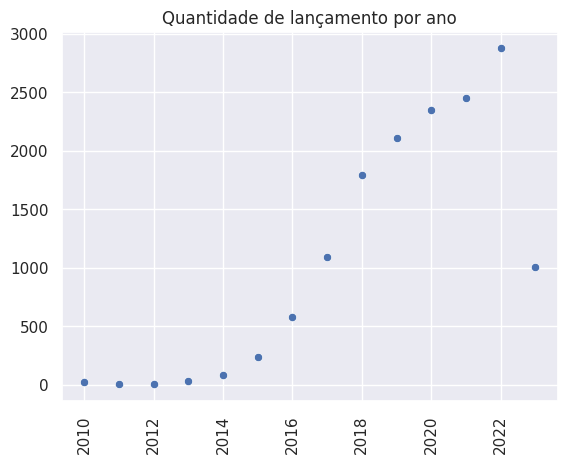

In [65]:
y = []
for i in ano:
  #Guardando a quantidade de lançamentos na lista y
  y.append(len(df[df['Year']==i]))
sns.scatterplot(x=l,y=y)
plt.title("Quantidade de lançamento por ano")
plt.xticks(rotation=90);

* **2022 é o ano com maior caso de lançamento. Vamos avaliar quantos lançamentos os top 5 mais bem avaliados em 2022 tiveram nesse ano**

In [29]:
#Acessando a informação com os gêneros mais bem avaliados em 2022
z = df[df['Year']==2022][['Genre',
                    'Rating']].groupby('Genre').mean()['Rating'].sort_values(
                                                    ascending=False
                                                                  )[:5]
#Pegando os gêneros e guardando na lista
l = z.index
#Criando um dicionário para amarzenar as informação do gênero e sua quantidade
#de lançamento no ano de 2022
d ={}
for i in l:
  d[i] = len(df[(df['Year']==2022)&(df['Genre']==i)])

#Colocando as informação na forma de uma series (para ficar mais apresentável)
df1 = pd.Series(data=d)
df1


Drama,Romance,Thriller      1
Short,Romance               1
Documentary,Short,Action    1
Animation,Fantasy,Sci-Fi    1
Animation,Comedy,Romance    2
dtype: int64

* **Realmente, no ano de 2022 temos que 'comedy','short','documentary' e 'drama' possuem mais laçamentos do que esses gêneros com melhores avaliações**

* ****
* **De acordo com a exploração feita até aqui. A quantidade de avaliações que os gêneros recebem influência bastante na proporção de gêneros lançados pela empresa.**